# **Task 1**

---

Download the Fashion-MNIST dataset [Here](https://github.com/zalandoresearch/fashion-mnist). It contains 28x28 single-channel images of clothes grouped into ten classes. There are 60000 examples in the training dataset and 10000 examples in the test dataset. Each training and test example has one of the following labels assigned:


----

We will focus on detecting shoes. Labels 5, 7 and 9 (Sandal, Sneaker and Ankle boot) should be treated as positive and all others (such as Trouser, Dress and so on) should be negative.

----
Please prepare a CNN model for binary classification in PyTorch. You should propose a custom architecture instead of using pretrained models. Train it on samples from Fashion-MNIST’s train dataset and evaluate the quality of the proposed model on samples from Fashion-MNIST’s test dataset.


In [35]:
# import the important Library
import numpy as np 
import tensorflow
import pandas as pd 
import matplotlib.pyplot as plt 
from keras.datasets import fashion_mnist
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout, Activation 
from tensorflow.keras.utils import to_categorical

In [2]:
# Load the Data
data = fashion_mnist.load_data()

4431872/4422102 [==============================] - 0s 0us/step


In [3]:
# Split data
(x_train,y_train), (x_test,y_test) = data

In [ ]:
x_train.shape,y_train.shape,x_test.shape,y_test.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

# **Data Formating**

In [4]:
#We will focus on detecting shoes. Labels 5, 7 and 9 (Sandal, Sneaker and Ankle boot) 
#should be treated as positive and all others (such as Trouser, Dress and so on) should be negative.
pos_train = []
pos_class = []
neg_train = []
neg_class = []

for i in y_train:
  if i == 5 or i== 7 or i == 9:
    pos_train.append(x_train[i].flatten())
    pos_class.append(int(1))
  else:
    neg_train.append(x_train[i].flatten())
    neg_class.append(int(0))




In [5]:
pos_train = pd.DataFrame(pos_train)
pos_class = pd.DataFrame(pos_class)
neg_train = pd.DataFrame(neg_train)
neg_class = pd.DataFrame(neg_class)

In [6]:
train_pos = pd.concat([pos_train, pos_class],axis = 1, ignore_index = True)

In [7]:
train_neg = pd.concat([neg_train, neg_class],axis = 1, ignore_index = True)

In [8]:
trainX = pd.concat([train_pos, train_neg],axis = 0, ignore_index = True)

In [9]:
trainX

,0,1,2,3,4,5,6,7,8,9,...,775,776,777,778,779,780,781,782,783,784
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,0,0,0,0,0,1,1,0,0,0,...,0,3,0,82,-19,-25,70,0,0,1
2,0,0,0,0,1,0,0,0,0,22,...,0,0,0,-123,-89,73,0,0,0,1
3,0,0,0,0,1,0,0,0,0,22,...,0,0,0,-123,-89,73,0,0,0,1
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59995,0,0,0,0,0,0,0,0,0,22,...,0,1,0,0,0,0,0,0,0,0
59996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59997,0,0,0,0,0,1,0,0,0,0,...,114,-126,76,0,0,0,0,0,0,0
59998,0,0,0,0,0,0,0,0,33,96,...,0,0,0,0,0,0,0,0,0,0


In [12]:
#We will focus on detecting shoes. Labels 5, 7 and 9 (Sandal, Sneaker and Ankle boot) 
#should be treated as positive and all others (such as Trouser, Dress and so on) should be negative.
pos_test = []
pos_class_test = []
neg_test = []
neg_class_tes = []

for i in y_test:
  if i == 5 or i== 7 or i == 9:
    pos_test.append(x_test[i].flatten())
    pos_class_test.append(1)
  else:
    neg_test.append(x_test[i].flatten())
    neg_class_tes.append(0)

In [13]:
pos_test = pd.DataFrame(pos_test)
pos_class_test = pd.DataFrame(pos_class_test)
neg_test = pd.DataFrame(neg_test)
neg_class_tes = pd.DataFrame(neg_class_tes)

In [14]:
test_pos = pd.concat([pos_test, pos_class_test],axis = 1, ignore_index = True)

In [15]:
test_neg = pd.concat([neg_test, neg_class_tes],axis = 1, ignore_index = True)

In [16]:
testX = pd.concat([test_pos, test_neg],axis = 0, ignore_index = True)

In [17]:
testX

,0,1,2,3,4,5,6,7,8,9,...,775,776,777,778,779,780,781,782,783,784
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,0,0,0,0,0,0,0,0,0,0,...,-127,62,0,0,0,0,0,0,0,1
2,0,0,0,0,0,0,0,0,2,3,...,0,0,35,84,55,0,0,0,0,1
3,0,0,0,0,0,0,0,0,0,0,...,-127,62,0,0,0,0,0,0,0,1
4,0,0,0,0,0,0,0,0,2,3,...,0,0,35,84,55,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9996,0,0,0,0,0,0,0,0,0,0,...,3,0,3,-82,-67,67,0,0,0,0
9997,0,0,0,0,0,0,0,0,0,0,...,3,0,3,-82,-67,67,0,0,0,0
9998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [21]:
whole_data = pd.concat([trainX,testX],axis = 0, ignore_index = True)

In [22]:
whole_data

,0,1,2,3,4,5,6,7,8,9,...,775,776,777,778,779,780,781,782,783,784
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,0,0,0,0,0,1,1,0,0,0,...,0,3,0,82,-19,-25,70,0,0,1
2,0,0,0,0,1,0,0,0,0,22,...,0,0,0,-123,-89,73,0,0,0,1
3,0,0,0,0,1,0,0,0,0,22,...,0,0,0,-123,-89,73,0,0,0,1
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
69996,0,0,0,0,0,0,0,0,0,0,...,3,0,3,-82,-67,67,0,0,0,0
69997,0,0,0,0,0,0,0,0,0,0,...,3,0,3,-82,-67,67,0,0,0,0
69998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# **Modeling Part**

In [57]:
X_train, X_test, y_train, y_test = train_test_split(whole_data.iloc[:,:-1], whole_data.iloc[:,-1:], test_size=0.2, random_state=42)

In [58]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((56000, 784), (14000, 784), (56000, 1), (14000, 1))

In [60]:
X_train = X_train.values.reshape(-1,28,28)
X_test = X_test.values.reshape(-1,28,28)

In [61]:
X_train.shape

(56000, 28, 28)

In [62]:
X_test.shape

(14000, 28, 28)

In [68]:
y_train = y_train.reshape(-1)

In [70]:
y_train.shape

(56000,)

In [71]:
y_test = y_test.values.reshape(-1)

In [72]:
y_test.shape

(14000,)

In [74]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((56000, 28, 28), (14000, 28, 28), (56000,), (14000,))

In [41]:
X_train = X_train.values.reshape(-1,28,28,1)
X_test = X_test.values.reshape(-1,28,28,1)

In [43]:
X_train.shape

(56000, 28, 28, 1)

In [76]:
# Reshaoing the datasets so that it works on keras API
# Keras accept input data as -> (num_img, img_shape, img_chenal)
X_train = X_train.reshape(-1,28,28,1)
X_test = X_test.reshape(-1,28,28,1)

In [77]:
# Data Scaling & Normalization
# Making Sure that the values are float so that we can decimal points after division 
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

# Normalization
X_train/=255-0.5
X_test/=255-0.5

# Convert the lable into a categorical by using one hot
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [81]:
# Creating the Sequential model
model = Sequential()
model.add(Conv2D(64,(3,3),activation = 'relu', input_shape = (28,28,1)))
model.add(Conv2D(64,(3,3),activation = 'relu'))
model.add(Dropout(0.25))
model.add(MaxPooling2D(2))

model.add(Conv2D(64,(3,3),activation = 'relu'))
model.add(Conv2D(64,(3,3),activation = 'relu'))
model.add(MaxPooling2D(2))

model.add(Flatten())
model.add(Dense(64))

model.add(Dense(2, activation = 'sigmoid'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 26, 26, 64)        640       
                                                                 
 conv2d_5 (Conv2D)           (None, 24, 24, 64)        36928     
                                                                 
 dropout_1 (Dropout)         (None, 24, 24, 64)        0         
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 12, 12, 64)       0         
 2D)                                                             
                                                                 
 conv2d_6 (Conv2D)           (None, 10, 10, 64)        36928     
                                                                 
 conv2d_7 (Conv2D)           (None, 8, 8, 64)          36928     
                                                      

In [83]:
# Compile the Model
model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

# Fit the model
hist = model.fit(X_train, y_train, epochs = 2, batch_size = 256, verbose = 1,validation_split = 0.20)

Epoch 1/2
175/175 [==============================] - 230s 1s/step - loss: 3.9058e-08 - accuracy: 1.0000 - val_loss: 9.8179e-08 - val_accuracy: 1.0000
Epoch 2/2
175/175 [==============================] - 230s 1s/step - loss: 2.4535e-09 - accuracy: 1.0000 - val_loss: 6.5364e-08 - val_accuracy: 1.0000


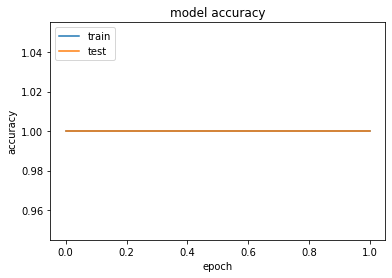

In [84]:
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

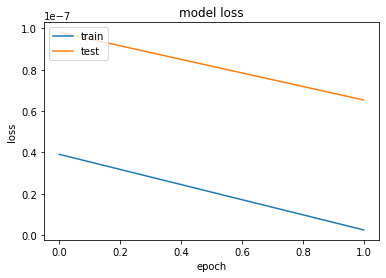

In [85]:
# summarize history for loss
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [87]:
# Score
score = model.evaluate(X_test, y_test, verbose=0)
print('Test Loss', score[0])
print('Test accuracy', score[1])

Test Loss 6.620190617923072e-08
Test accuracy 1.0


In [88]:
y_pred = model.predict(X_test)
y_test_class = np.argmax(y_test,axis=1)
y_pred_class = np.argmax(y_pred,axis=1)

In [92]:
from sklearn.metrics import classification_report
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test_class,y_pred_class))
print(confusion_matrix(y_test_class,y_pred_class))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      9829
           1       1.00      1.00      1.00      4171

    accuracy                           1.00     14000
   macro avg       1.00      1.00      1.00     14000
weighted avg       1.00      1.00      1.00     14000

[[9829    0]
 [   0 4171]]


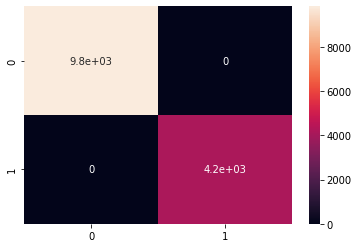

In [94]:
import seaborn as sns
sns.heatmap(cm,annot=True)
plt.savefig('h1.png')

In [95]:
# Calculate the Accuracy
from sklearn.metrics import accuracy_score
score=accuracy_score(y_pred_class,y_test_class)
score

1.0